In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] ='Malgun Gothic'

### 전처리
- 각 데이터프레임의 '발생시각', '규모, '깊이', '위치', '진도' 사용
- '규모'는 한국 데이터에 결측치가 11776개중 2개 존재 -> 행 삭제
- '진도'는 한국 데이터에 11776개중 7000개 정도 2019년부터 진도가 기록되있음 -> 2019년도 이후 분석시 '진도'컬럼 사용
- '깊이'는 한국 데이터에 1000개 정도의 결측치 -> 깊이 관련 데이터 분석시 삭제
- 컬럼 이름 통합
- 각 컬럼의 자료형 변환

In [31]:
df_okc = pd.read_csv('../dataset/EDA후 데이터셋/지진/시계열_오클라호마_지진데이터_EDA.csv')
df_okc

,origintime,magnitude,max_mmi,latitude,longitude,depth_km
0,1918-09-10 16:30:00,3.4,5.0,35.500000,-98.000000,5.00
1,1918-09-11 06:30:00,3.4,6.0,35.500000,-98.000000,5.00
2,1926-06-20 14:20:00,4.3,5.0,35.600000,-94.900000,5.00
3,1929-12-28 00:30:00,4.0,6.0,35.500000,-98.000000,5.00
4,1933-08-19 19:30:00,3.3,5.0,35.500000,-98.000000,5.00
...,...,...,...,...,...,...
28002,2024-10-20 10:45:20,2.5,NaN,34.751333,-97.566000,10.69
28003,2024-10-28 05:23:13,2.6,NaN,35.086500,-95.519000,7.46
28004,2024-10-28 16:14:52,2.6,NaN,36.468667,-98.803667,6.35
28005,2024-10-28 17:31:44,2.7,NaN,36.464500,-98.803833,6.70


In [32]:
df_okc = df_okc.rename(columns={'origintime':'발생시각', 'magnitude':'규모', 'max_mmi':'진도', 'latitude':'위도', 'longitude':'경도', 'depth_km':'깊이'})
df_okc

,발생시각,규모,진도,위도,경도,깊이
0,1918-09-10 16:30:00,3.4,5.0,35.500000,-98.000000,5.00
1,1918-09-11 06:30:00,3.4,6.0,35.500000,-98.000000,5.00
2,1926-06-20 14:20:00,4.3,5.0,35.600000,-94.900000,5.00
3,1929-12-28 00:30:00,4.0,6.0,35.500000,-98.000000,5.00
4,1933-08-19 19:30:00,3.3,5.0,35.500000,-98.000000,5.00
...,...,...,...,...,...,...
28002,2024-10-20 10:45:20,2.5,NaN,34.751333,-97.566000,10.69
28003,2024-10-28 05:23:13,2.6,NaN,35.086500,-95.519000,7.46
28004,2024-10-28 16:14:52,2.6,NaN,36.468667,-98.803667,6.35
28005,2024-10-28 17:31:44,2.7,NaN,36.464500,-98.803833,6.70


In [43]:
df_okc.to_csv('시계열_오클라호마_지진데이터_찐최종.csv', index=False, encoding='utf-8')

In [34]:
df_kor = pd.read_csv('../dataset/EDA후 데이터셋/지진/시계열_한국_지진데이터_EDA.csv')
df_kor

,발생시각,규모,깊이(km),진도,위도,경도,위치
0,2000-12-22 08:19:39,2.7,NaN,NaN,36.30 N,127.40 E,대전 중구 남서쪽 4km 지역
1,2000-12-09 18:51:00,3.7,NaN,NaN,36.50 N,130.00 E,경북 영덕군 동쪽 57km 해역
2,2000-12-02 16:53:40,3.1,NaN,NaN,34.60 N,126.90 E,전남 장흥군 남쪽 9km 지역
3,2000-11-14 17:41:52,2.9,NaN,NaN,38.80 N,125.80 E,북한 황해북도 송림 동북동쪽 16km 지역
4,2000-11-05 21:39:41,2.2,NaN,NaN,36.20 N,127.20 E,충남 논산시 동북동쪽 9km 지역
...,...,...,...,...,...,...,...
11771,2024-01-06 00:39:02,1.4,20.0,1.0,36.72 N,129.66 E,경북 울진군 남동쪽 38km 해역
11772,2024-01-04 03:52:50,1.3,8.0,1.0,36.28 N,127.76 E,충북 옥천군 동쪽 17km 지역
11773,2024-01-04 03:28:11,1.4,8.0,1.0,36.28 N,127.76 E,충북 옥천군 동쪽 17km 지역
11774,2024-01-02 03:16:34,1.3,19.0,1.0,35.21 N,129.50 E,부산 기장군 동쪽 26km 해역


In [35]:
df_kor = df_kor.rename(columns={'깊이(km)':'깊이'})
df_kor

,발생시각,규모,깊이,진도,위도,경도,위치
0,2000-12-22 08:19:39,2.7,NaN,NaN,36.30 N,127.40 E,대전 중구 남서쪽 4km 지역
1,2000-12-09 18:51:00,3.7,NaN,NaN,36.50 N,130.00 E,경북 영덕군 동쪽 57km 해역
2,2000-12-02 16:53:40,3.1,NaN,NaN,34.60 N,126.90 E,전남 장흥군 남쪽 9km 지역
3,2000-11-14 17:41:52,2.9,NaN,NaN,38.80 N,125.80 E,북한 황해북도 송림 동북동쪽 16km 지역
4,2000-11-05 21:39:41,2.2,NaN,NaN,36.20 N,127.20 E,충남 논산시 동북동쪽 9km 지역
...,...,...,...,...,...,...,...
11771,2024-01-06 00:39:02,1.4,20.0,1.0,36.72 N,129.66 E,경북 울진군 남동쪽 38km 해역
11772,2024-01-04 03:52:50,1.3,8.0,1.0,36.28 N,127.76 E,충북 옥천군 동쪽 17km 지역
11773,2024-01-04 03:28:11,1.4,8.0,1.0,36.28 N,127.76 E,충북 옥천군 동쪽 17km 지역
11774,2024-01-02 03:16:34,1.3,19.0,1.0,35.21 N,129.50 E,부산 기장군 동쪽 26km 해역


In [36]:
df_kor = df_kor.sort_values(by='발생시각')
df_kor

,발생시각,규모,깊이,진도,위도,경도,위치
28,2000-01-18 15:08:50,3.0,NaN,NaN,38.70 N,127.90 E,북한 강원 회양 동쪽 26km 지역
27,2000-02-21 01:06:31,2.1,NaN,NaN,35.80 N,128.20 E,경북 고령군 북서쪽 10km 지역
26,2000-03-15 01:10:52,2.5,NaN,NaN,36.30 N,125.90 E,전북 군산시 어청도 북북서쪽 20km 해역
25,2000-03-21 13:43:56,2.3,NaN,NaN,36.50 N,126.00 E,충남 태안군 남서쪽 38km 해역
24,2000-04-12 04:44:01,3.5,NaN,NaN,36.90 N,125.30 E,충남 태안군 서격렬비열도 북북서쪽 39km 해역
...,...,...,...,...,...,...,...
11092,2024-11-04 07:34:00,1.3,18.0,1.0,38.63 N,127.52 E,북한 강원 회양 남서쪽 11km 지역
11091,2024-11-04 09:22:39,1.3,13.0,1.0,35.75 N,129.18 E,경북 경주시 남남서쪽 12km 지역
11090,2024-11-04 13:46:20,1.9,16.0,1.0,33.41 N,125.17 E,제주 제주시 서쪽 127km 해역
10276,NaN,NaN,NaN,NaN,위도,경도,위치


In [37]:
df_kor = df_kor.reset_index(drop=True)
df_kor

,발생시각,규모,깊이,진도,위도,경도,위치
0,2000-01-18 15:08:50,3.0,NaN,NaN,38.70 N,127.90 E,북한 강원 회양 동쪽 26km 지역
1,2000-02-21 01:06:31,2.1,NaN,NaN,35.80 N,128.20 E,경북 고령군 북서쪽 10km 지역
2,2000-03-15 01:10:52,2.5,NaN,NaN,36.30 N,125.90 E,전북 군산시 어청도 북북서쪽 20km 해역
3,2000-03-21 13:43:56,2.3,NaN,NaN,36.50 N,126.00 E,충남 태안군 남서쪽 38km 해역
4,2000-04-12 04:44:01,3.5,NaN,NaN,36.90 N,125.30 E,충남 태안군 서격렬비열도 북북서쪽 39km 해역
...,...,...,...,...,...,...,...
11771,2024-11-04 07:34:00,1.3,18.0,1.0,38.63 N,127.52 E,북한 강원 회양 남서쪽 11km 지역
11772,2024-11-04 09:22:39,1.3,13.0,1.0,35.75 N,129.18 E,경북 경주시 남남서쪽 12km 지역
11773,2024-11-04 13:46:20,1.9,16.0,1.0,33.41 N,125.17 E,제주 제주시 서쪽 127km 해역
11774,NaN,NaN,NaN,NaN,위도,경도,위치


In [38]:
df_kor = df_kor.drop(index=[11774,11775])
df_kor

,발생시각,규모,깊이,진도,위도,경도,위치
0,2000-01-18 15:08:50,3.0,NaN,NaN,38.70 N,127.90 E,북한 강원 회양 동쪽 26km 지역
1,2000-02-21 01:06:31,2.1,NaN,NaN,35.80 N,128.20 E,경북 고령군 북서쪽 10km 지역
2,2000-03-15 01:10:52,2.5,NaN,NaN,36.30 N,125.90 E,전북 군산시 어청도 북북서쪽 20km 해역
3,2000-03-21 13:43:56,2.3,NaN,NaN,36.50 N,126.00 E,충남 태안군 남서쪽 38km 해역
4,2000-04-12 04:44:01,3.5,NaN,NaN,36.90 N,125.30 E,충남 태안군 서격렬비열도 북북서쪽 39km 해역
...,...,...,...,...,...,...,...
11769,2024-11-04 05:47:05,1.5,18.0,1.0,36.47 N,129.63 E,경북 영덕군 동북동쪽 24km 해역
11770,2024-11-04 06:15:43,1.8,18.0,1.0,36.47 N,129.63 E,경북 영덕군 동북동쪽 24km 해역
11771,2024-11-04 07:34:00,1.3,18.0,1.0,38.63 N,127.52 E,북한 강원 회양 남서쪽 11km 지역
11772,2024-11-04 09:22:39,1.3,13.0,1.0,35.75 N,129.18 E,경북 경주시 남남서쪽 12km 지역


In [44]:
df_kor.to_csv('시계열_한국_지진데이터_찐최종.csv', index=False, encoding='utf-8')

In [40]:
print(df_kor.info())
print(df_okc.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11774 entries, 0 to 11773
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   발생시각    11774 non-null  object 
 1   규모      11774 non-null  float64
 2   깊이      10494 non-null  float64
 3   진도      5226 non-null   float64
 4   위도      11774 non-null  object 
 5   경도      11774 non-null  object 
 6   위치      11774 non-null  object 
dtypes: float64(3), object(4)
memory usage: 644.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28007 entries, 0 to 28006
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   발생시각    28007 non-null  object 
 1   규모      28007 non-null  float64
 2   진도      23297 non-null  float64
 3   위도      28007 non-null  float64
 4   경도      28007 non-null  float64
 5   깊이      28007 non-null  float64
dtypes: float64(5), object(1)
memory usage: 1.3+ MB
None


In [42]:
df_kor['발생시각'] = pd.to_datetime(df_kor['발생시각'])
df_okc['발생시각'] = pd.to_datetime(df_okc['발생시각'])
print(df_kor.info())
print(df_okc.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11774 entries, 0 to 11773
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   발생시각    11774 non-null  datetime64[ns]
 1   규모      11774 non-null  float64       
 2   깊이      10494 non-null  float64       
 3   진도      5226 non-null   float64       
 4   위도      11774 non-null  object        
 5   경도      11774 non-null  object        
 6   위치      11774 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 644.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28007 entries, 0 to 28006
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   발생시각    28007 non-null  datetime64[ns]
 1   규모      28007 non-null  float64       
 2   진도      23297 non-null  float64       
 3   위도      28007 non-null  float64       
 4   경도      28007 non-null  float64       
 5

### Data Analysis

##### 오클라호마 지진 빈도 발생 분석 (vs 한국)

In [46]:
df_kor = pd.read_csv('..\dataset\찐최종 데이터셋\지진\시계열_한국_지진데이터_찐최종.csv')
df_okc = pd.read_csv('..\dataset\찐최종 데이터셋\지진\시계열_오클라호마_지진데이터_찐최종.csv')

In [49]:
df_kor

,발생시각,규모,깊이,진도,위도,경도,위치
0,2000-01-18 15:08:50,3.0,NaN,NaN,38.70 N,127.90 E,북한 강원 회양 동쪽 26km 지역
1,2000-02-21 01:06:31,2.1,NaN,NaN,35.80 N,128.20 E,경북 고령군 북서쪽 10km 지역
2,2000-03-15 01:10:52,2.5,NaN,NaN,36.30 N,125.90 E,전북 군산시 어청도 북북서쪽 20km 해역
3,2000-03-21 13:43:56,2.3,NaN,NaN,36.50 N,126.00 E,충남 태안군 남서쪽 38km 해역
4,2000-04-12 04:44:01,3.5,NaN,NaN,36.90 N,125.30 E,충남 태안군 서격렬비열도 북북서쪽 39km 해역
...,...,...,...,...,...,...,...
11769,2024-11-04 05:47:05,1.5,18.0,1.0,36.47 N,129.63 E,경북 영덕군 동북동쪽 24km 해역
11770,2024-11-04 06:15:43,1.8,18.0,1.0,36.47 N,129.63 E,경북 영덕군 동북동쪽 24km 해역
11771,2024-11-04 07:34:00,1.3,18.0,1.0,38.63 N,127.52 E,북한 강원 회양 남서쪽 11km 지역
11772,2024-11-04 09:22:39,1.3,13.0,1.0,35.75 N,129.18 E,경북 경주시 남남서쪽 12km 지역


In [50]:
df_okc

,발생시각,규모,진도,위도,경도,깊이
0,1918-09-10 16:30:00,3.4,5.0,35.500000,-98.000000,5.00
1,1918-09-11 06:30:00,3.4,6.0,35.500000,-98.000000,5.00
2,1926-06-20 14:20:00,4.3,5.0,35.600000,-94.900000,5.00
3,1929-12-28 00:30:00,4.0,6.0,35.500000,-98.000000,5.00
4,1933-08-19 19:30:00,3.3,5.0,35.500000,-98.000000,5.00
...,...,...,...,...,...,...
28002,2024-10-20 10:45:20,2.5,NaN,34.751333,-97.566000,10.69
28003,2024-10-28 05:23:13,2.6,NaN,35.086500,-95.519000,7.46
28004,2024-10-28 16:14:52,2.6,NaN,36.468667,-98.803667,6.35
28005,2024-10-28 17:31:44,2.7,NaN,36.464500,-98.803833,6.70


In [51]:
print(df_kor.info())
print(df_okc.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11774 entries, 0 to 11773
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   발생시각    11774 non-null  object 
 1   규모      11774 non-null  float64
 2   깊이      10494 non-null  float64
 3   진도      5226 non-null   float64
 4   위도      11774 non-null  object 
 5   경도      11774 non-null  object 
 6   위치      11774 non-null  object 
dtypes: float64(3), object(4)
memory usage: 644.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28007 entries, 0 to 28006
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   발생시각    28007 non-null  object 
 1   규모      28007 non-null  float64
 2   진도      23297 non-null  float64
 3   위도      28007 non-null  float64
 4   경도      28007 non-null  float64
 5   깊이      28007 non-null  float64
dtypes: float64(5), object(1)
memory usage: 1.3+ MB
None


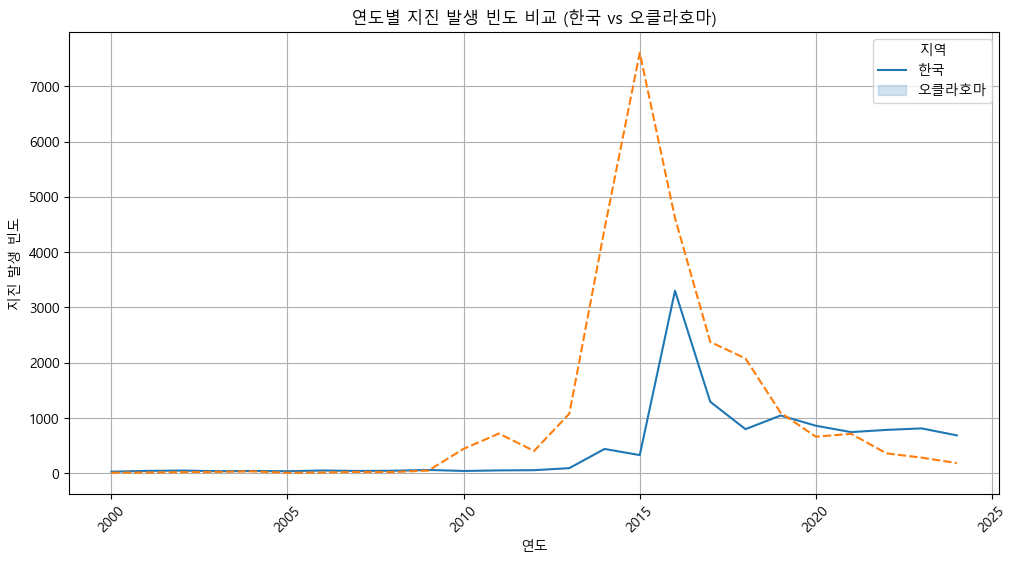

In [55]:
df_kor['발생시각'] = pd.to_datetime(df_kor['발생시각'])
df_okc['발생시각'] = pd.to_datetime(df_okc['발생시각'])

df_kor['연도'] = df_kor['발생시각'].dt.year
df_okc['연도'] = df_okc['발생시각'].dt.year

df_okc_filtered = df_okc[df_okc['연도'] >= 2000]

kor_cnt = df_kor['연도'].value_counts().sort_index()
okc_cnt = df_okc_filtered['연도'].value_counts().sort_index()

counts_df = pd.DataFrame({
    'Korea': kor_cnt,
    'Oklahoma': okc_cnt
})

plt.figure(figsize=(12, 6))
sns.lineplot(data=counts_df)
plt.title('연도별 지진 발생 빈도 비교 (한국 vs 오클라호마)')
plt.xlabel('연도')
plt.ylabel('지진 발생 빈도')
plt.xticks(rotation=45)
plt.legend(title='지역', labels=['한국', '오클라호마'])
plt.grid()
plt.show()

2000년도 이후의 데이터를 보았을 때 한국과 오클라호마의 지진빈도 경향은 많이 닮아있다

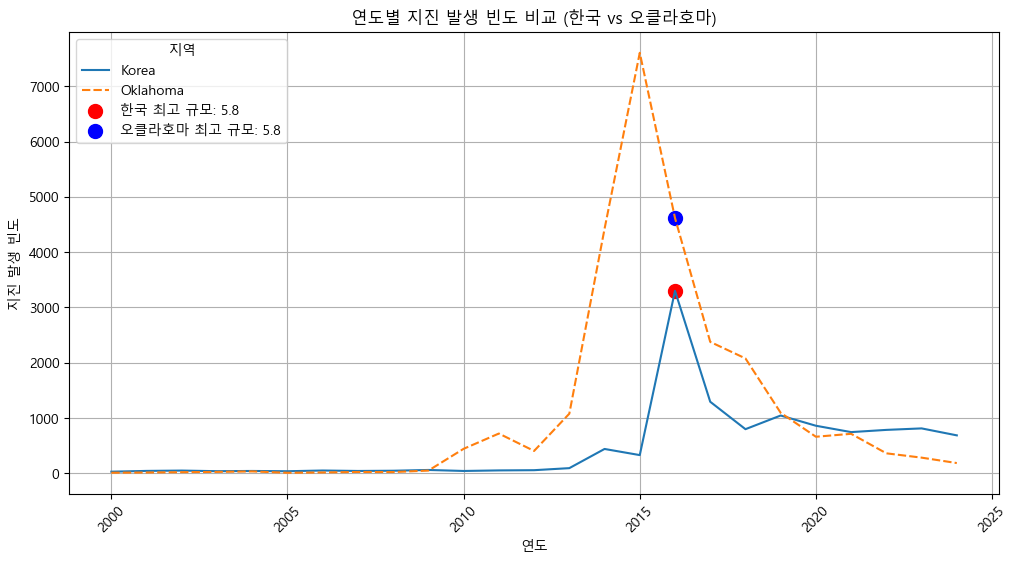

In [56]:
df_kor['발생시각'] = pd.to_datetime(df_kor['발생시각'])
df_okc['발생시각'] = pd.to_datetime(df_okc['발생시각'])

# 연도 컬럼 추가
df_kor['연도'] = df_kor['발생시각'].dt.year
df_okc['연도'] = df_okc['발생시각'].dt.year

# 2000년 이후의 데이터만 필터링
df_okc_filtered = df_okc[df_okc['연도'] >= 2000]

# 연도별 지진 발생 빈도 집계
kor_cnt = df_kor['연도'].value_counts().sort_index()
okc_cnt = df_okc_filtered['연도'].value_counts().sort_index()

# 데이터프레임으로 변환
counts_df = pd.DataFrame({
    'Korea': kor_cnt,
    'Oklahoma': okc_cnt
}).fillna(0)  # 결측값 0으로 채우기

# 최고 규모 찾기
max_kor = df_kor['규모'].max()
max_okc = df_okc_filtered['규모'].max()

# 최고 규모의 연도 찾기
max_kor_year = df_kor.loc[df_kor['규모'] == max_kor, '연도'].values[0]
max_okc_year = df_okc_filtered.loc[df_okc_filtered['규모'] == max_okc, '연도'].values[0]

# 그래프 그리기
plt.figure(figsize=(12, 6))
sns.lineplot(data=counts_df)
plt.title('연도별 지진 발생 빈도 비교 (한국 vs 오클라호마)')
plt.xlabel('연도')
plt.ylabel('지진 발생 빈도')
plt.xticks(rotation=45)
plt.legend(title='지역', labels=['한국', '오클라호마'])
plt.grid()

# 최고 규모 마커 추가
plt.scatter(max_kor_year, kor_cnt[max_kor_year], color='red', s=100, label=f'한국 최고 규모: {max_kor}')
plt.scatter(max_okc_year, okc_cnt[max_okc_year], color='blue', s=100, label=f'오클라호마 최고 규모: {max_okc}')

plt.legend(title='지역', loc='upper left')
plt.show()

한국과 오클라호마 둘 다 지진의 빈도가 급격히 증가한 시점 근처에서 최고 규모의 지진이 발생하였다.

##### 오클라호마 지진 규모 분석

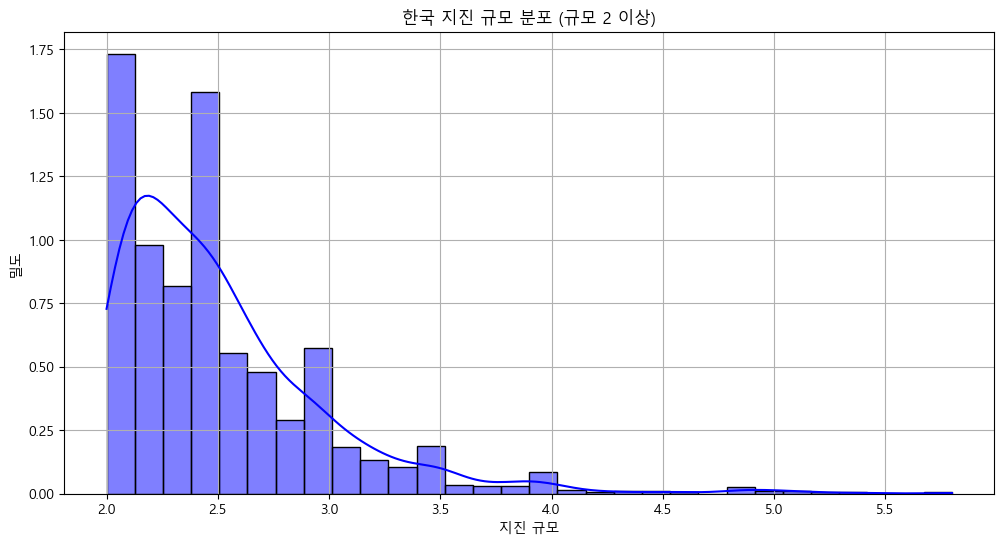

In [60]:
# 발생 시각을 datetime 형식으로 변환
df_kor['발생시각'] = pd.to_datetime(df_kor['발생시각'])

# 규모 2 이상 필터링
df_kor_filtered = df_kor[df_kor['규모'] >= 2]

# 한국 지진 규모 분포 히스토그램 (규모 2 이상)
plt.figure(figsize=(12, 6))
sns.histplot(df_kor_filtered['규모'], bins=30, color='blue', kde=True, stat='density', alpha=0.5)
plt.title('한국 지진 규모 분포 (규모 2 이상)')
plt.xlabel('지진 규모')
plt.ylabel('밀도')
plt.grid()
plt.show()

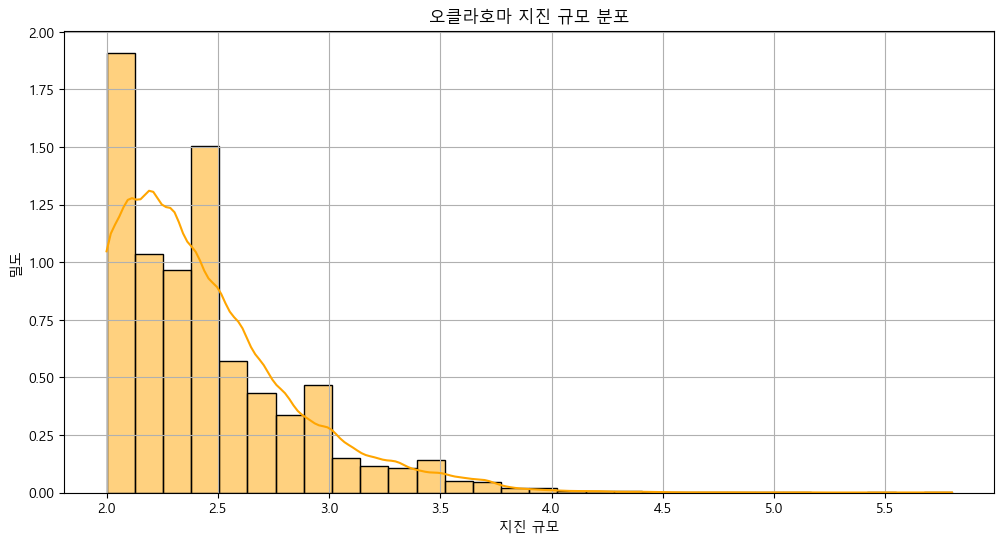

In [ ]:
df_okc['발생시각'] = pd.to_datetime(df_okc['발생시각'])
# 오클라호마 지진 규모 분포 히스토그램
plt.figure(figsize=(12, 6))
sns.histplot(df_okc['규모'], bins=30, color='orange', kde=True, stat='density', alpha=0.5)
plt.title('오클라호마 지진 규모 분포')
plt.xlabel('지진 규모')
plt.ylabel('밀도')
plt.grid()
plt.show()

규모가 2이상인 데이터에서 규모의 분포가 비슷하게 나타남
한국과 오클라호마는 불의고리, 지진대에도 속하지 않지만 비슷한 경향을 나타냄 -> 다른 외부요인이 있었을 것임

##### 한국 vs 오클라호마 오전 오후별 지진 발생 빈도

<Figure size 800x500 with 0 Axes>

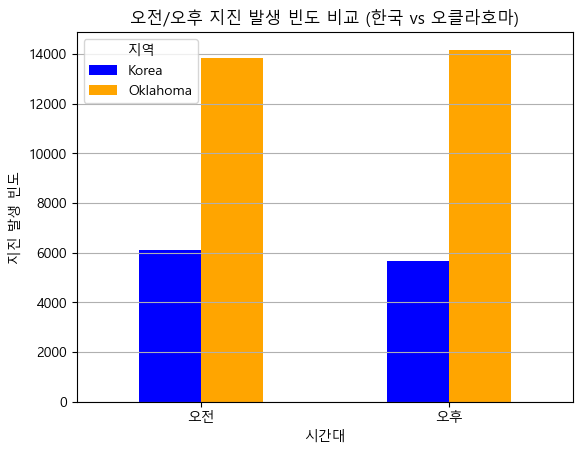

In [61]:
df_kor['발생시각'] = pd.to_datetime(df_kor['발생시각'])
df_okc['발생시각'] = pd.to_datetime(df_okc['발생시각'])

# 시간대 컬럼 추가
df_kor['시간대'] = df_kor['발생시각'].dt.hour
df_okc['시간대'] = df_okc['발생시각'].dt.hour

# 오전과 오후로 나누기
df_kor['구분'] = df_kor['시간대'].apply(lambda x: '오전' if x < 12 else '오후')
df_okc['구분'] = df_okc['시간대'].apply(lambda x: '오전' if x < 12 else '오후')

# 오전/오후별 발생 빈도 집계
kor_counts = df_kor['구분'].value_counts()
okc_counts = df_okc['구분'].value_counts()

# 데이터프레임으로 변환
counts_df = pd.DataFrame({
    'Korea': kor_counts,
    'Oklahoma': okc_counts
})

# 그래프 그리기
plt.figure(figsize=(8, 5))
counts_df.plot(kind='bar', color=['blue', 'orange'])
plt.title('오전/오후 지진 발생 빈도 비교 (한국 vs 오클라호마)')
plt.xlabel('시간대')
plt.ylabel('지진 발생 빈도')
plt.xticks(rotation=0)
plt.legend(title='지역')
plt.grid(axis='y')
plt.show()

오전 오후 비율은 두 지역 모두 1:1로 시간에 따른 영향은 없을 것으로 예상